**Import Libraries**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

**Load Dataset**

In [2]:
df=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# EDA (Exploratory Data Analysis)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
# selecting given columns
df2=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)
df2


,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
# rename the columns for easy use
df3=df2.rename({'Age_08_04':'Age','cc':'CC','Quarterly_Tax':'QT','Weight':'WT'},axis=1)
df3

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [6]:
# searching for duplicated values
df3[df3.duplicated()]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
113,24950,8,13253,116,2000,5,5,234,1320


In [7]:
# remove the duplicated values
df4=df3.drop_duplicates().reset_index(drop=True)
df4

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [8]:
df4.describe()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


# Correlation

In [9]:
df4.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
CC,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
WT,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# pairplot

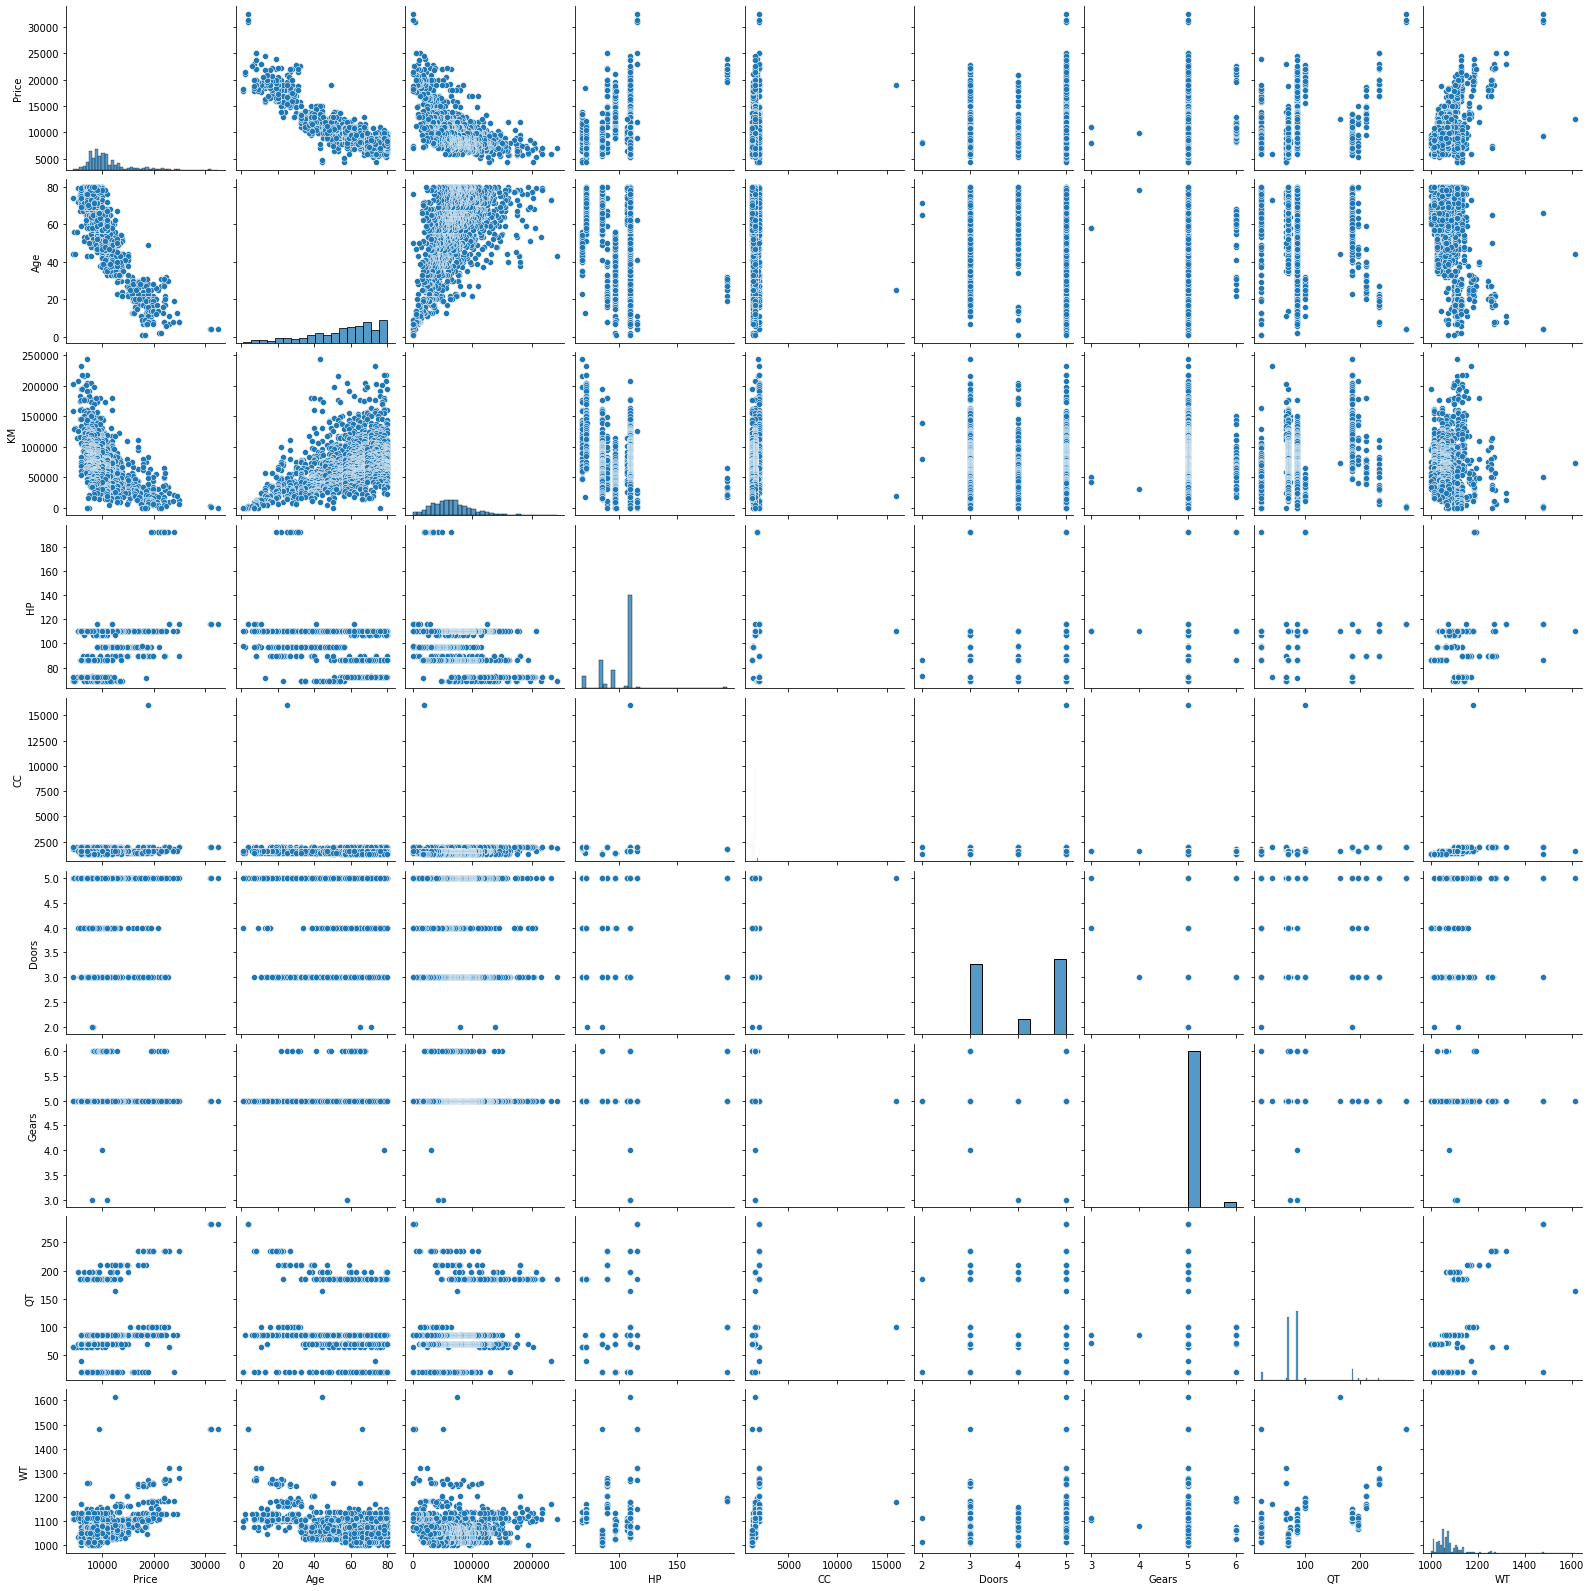

In [10]:
sb.pairplot(df4)

# Build a Model

In [11]:
model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=df4).fit()

# Model Testing

In [12]:
# finding co-efficient parameters
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
CC             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
WT             16.855470
dtype: float64

In [13]:
# find tvalues & pvalues
np.round(model.tvalues,4), np.round(model.pvalues,4)

(Intercept    -3.8753
 Age         -46.5519
 KM          -16.5524
 HP           11.2097
 CC           -1.3164
 Doors        -0.0230
 Gears         3.0346
 QT            2.9442
 WT           15.7607
 dtype: float64, Intercept    0.0001
 Age          0.0000
 KM           0.0000
 HP           0.0000
 CC           0.1882
 Doors        0.9816
 Gears        0.0025
 QT           0.0033
 WT           0.0000
 dtype: float64)

**pvalues which are >0.05 are considered as INSIGNIFICANT (where CC,Doors are Insignificant)**

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        05:06:41   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
CC            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
QT             3.8588      1.311      2.944      0.003       1.288       6.430
WT            16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**from the above summary we can know the values of (R2, adjR2, coefficient parameters, tvalues, pvalues etc)**

# Build SLR & MLR model for Insignificant Variables 'CC & Doors'

In [15]:
slr_c=smf.ols('Price~CC',data=df4).fit()
slr_c.tvalues, slr_c.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64, Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

**CC is Significant when calculated indivudually**

In [16]:
slr_d=smf.ols('Price~Doors',data=df4).fit()
slr_d.tvalues, slr_d.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64, Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

**Doors is Significant when calculated indivudually**

In [17]:
mlr_cd=smf.ols('Price~CC+Doors',data=df4).fit()
mlr_cd.tvalues, mlr_cd.pvalues

(Intercept    12.786341
 CC            4.268006
 Doors         6.752236
 dtype: float64, Intercept    1.580945e-35
 CC           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

**Both CC & Doors are Significant, so these are important to predict the data**

# VIF (Variance Inflation Factor)

In [24]:
# VIF=(1/1-R2) calculate for all independent variables

rsq_age=smf.ols('Age~KM+HP+CC+Doors+Gears+QT+WT',data=df4).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_km=smf.ols('KM~Age+HP+CC+Doors+Gears+QT+WT',data=df4).fit().rsquared
vif_km=1/(1-rsq_km)

rsq_hp=smf.ols('HP~Age+KM+CC+Doors+Gears+QT+WT',data=df4).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_cc=smf.ols('CC~Age+KM+HP+Doors+Gears+QT+WT',data=df4).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_doors=smf.ols('Doors~Age+KM+HP+CC+Gears+QT+WT',data=df4).fit().rsquared
vif_doors=1/(1-rsq_doors)

rsq_gears=smf.ols('Gears~Age+KM+HP+CC+Doors+QT+WT',data=df4).fit().rsquared
vif_gears=1/(1-rsq_gears)

rsq_qt=smf.ols('QT~Age+KM+HP+CC+Doors+Gears+WT',data=df4).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_wt=smf.ols('WT~Age+KM+HP+CC+Doors+Gears+QT',data=df4).fit().rsquared
vif_wt=1/(1-rsq_wt)

# storing VIF values in DataFrame
d1={'Variables':['Age','KM','HP','CC','Doors','Gears','QT','WT'],
    'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_qt,vif_wt]}
Vif_df=pd.DataFrame(d1)
Vif_df


,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,CC,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,WT,2.487180


**None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation**

# Model Validation Techniques

**1) Test for Normality of Residuals [QQ (Quantiles) plots]**

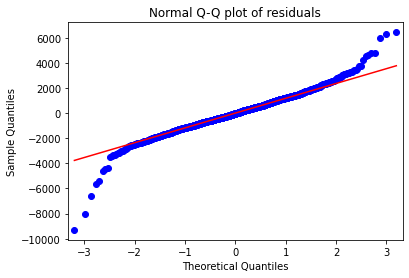

In [27]:
qqplot=sm.qqplot(model.resid,line='q')
# 'q' - a line which fits through the quartiles
# line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [28]:
# to improve the performance of your model, remove the outliers
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [29]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

**2) Residual Plot for Homoscedasticity**

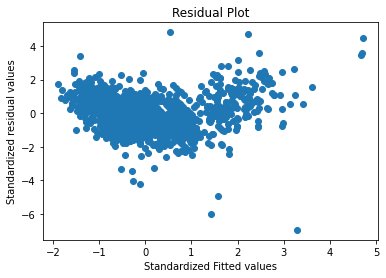

In [31]:
# z = (x - mu)/sigma
def get_standardized_values(vals):return (vals-vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

**3) Residual Vs Regressor Plots**

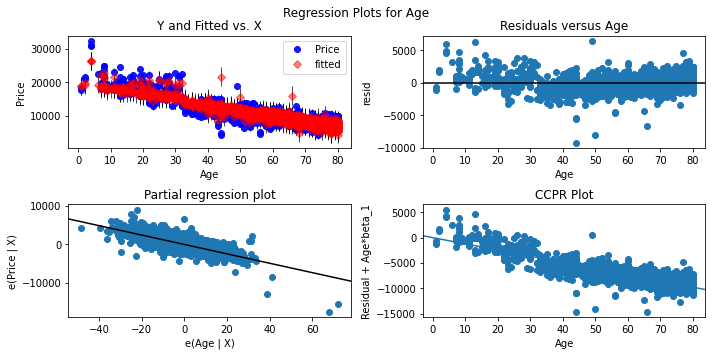

In [33]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

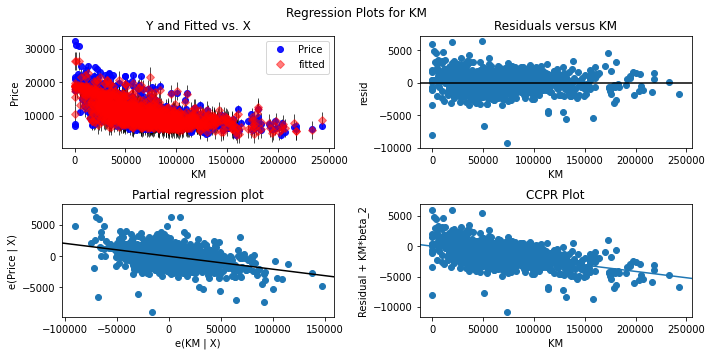

In [34]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

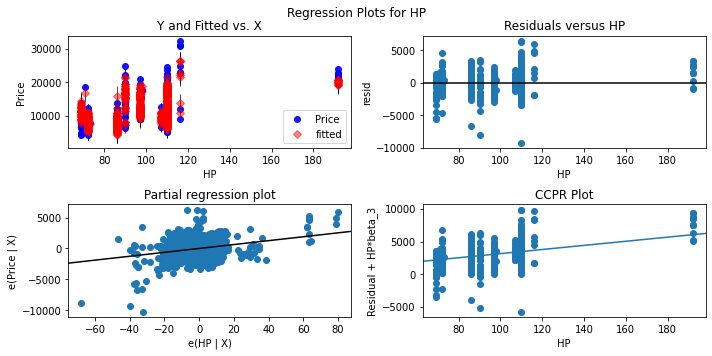

In [35]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

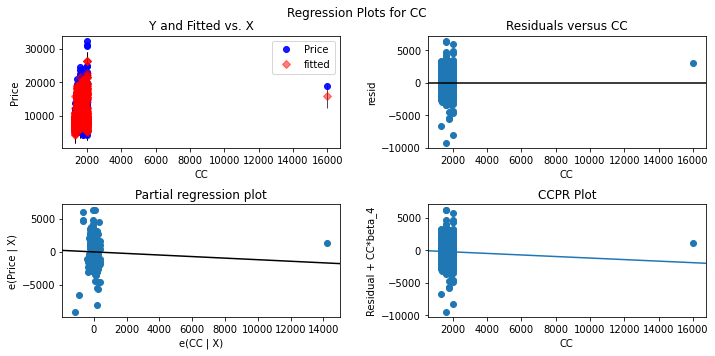

In [36]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

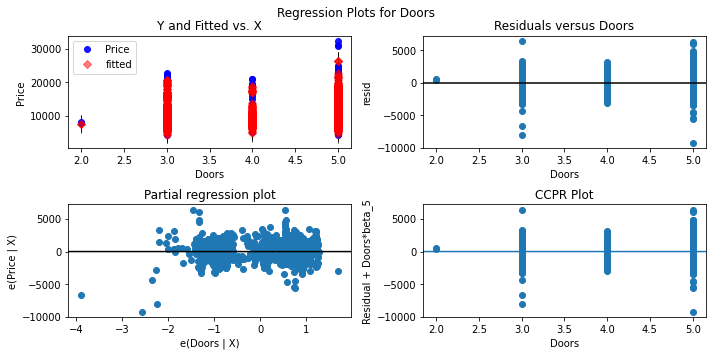

In [37]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

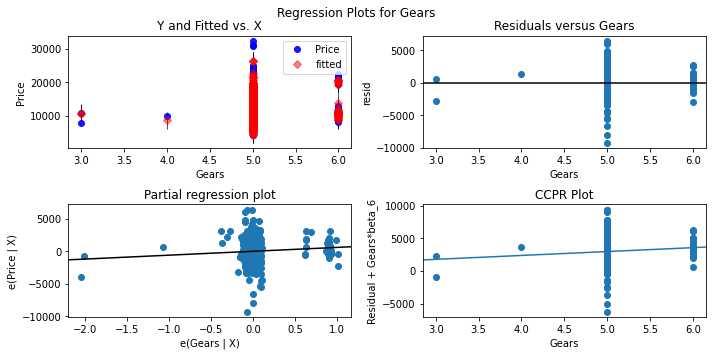

In [38]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

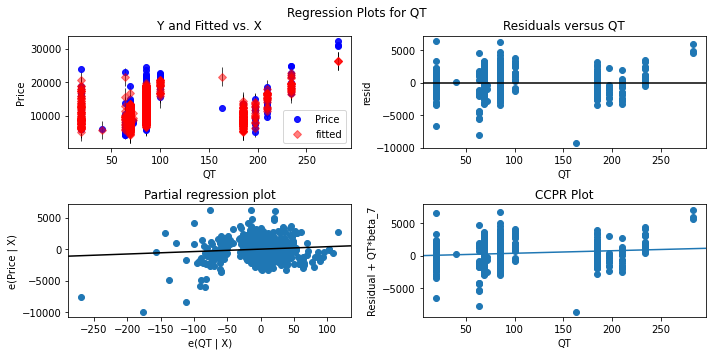

In [39]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "QT", fig=fig)
plt.show()

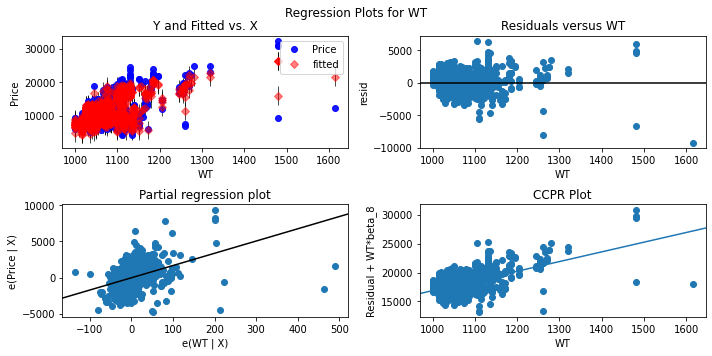

In [40]:
fig = plt.figure(figsize=(10,5))
fig = sm.graphics.plot_regress_exog(model, "WT", fig=fig)
plt.show()

# Model Deletion Diagnostics

**Cross verify the presence of influencing observations by 2 methods to spot 'Outliers/Infuencers'**

**1) Cook's Distance**

<ipython-input-42-016a22eb326b>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(df4)), np.round(c, 3))


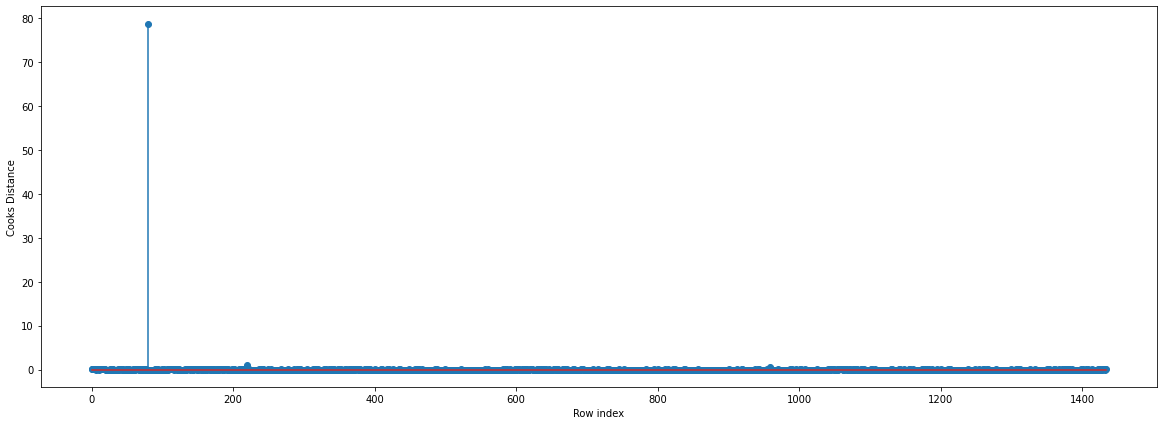

In [42]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df4)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [43]:
#index and value of influencer where c is more than 0.5
(np.argmax(c),np.max(c))

(80, 78.72950582258927)

**2) Leverage Value**

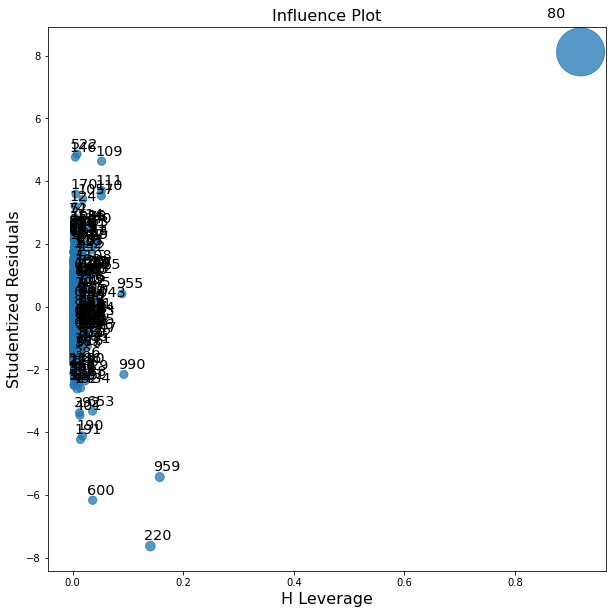

In [47]:
fig,ax=plt.subplots(figsize=(10,10))
fig=influence_plot(model,ax=ax)

In [44]:
# manual calculation
# cutoff value = 3(k+1)/n = 3(9+1)/1435 = 0.0209059233, where k= no of Features, n= no of Observations
k=df4.shape[1]
n=df4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [45]:
df4[df4.index.isin([80])]

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
80,18950,25,20019,110,16000,5,5,100,1180


# Improve the Model

In [50]:
# creating a copy of data so that original dataset is not affected
df_new=df4.copy()
df_new

,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [51]:
# discard the data points which are influencers and re-assign the row number
df5=df_new.drop(df_new.index[[80]],axis=0).reset_index(drop=True)
df5


,Price,Age,KM,HP,CC,Doors,Gears,QT,WT
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


**Final Model**

In [57]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=df5).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        df5=df5.drop(df5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        df5
    else:
        final_model=smf.ols('Price~Age+KM+HP+CC+Doors+Gears+QT+WT',data=df5).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)



Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171205
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319988
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605557
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147551
Thus model accuracy is improved to 0.8949455651565241
Thus model accuracy is impro

In [58]:
final_model.rsquared

0.9003762532318559

# Predicting The New Model

In [59]:
new_data=pd.DataFrame({'Age':20,"KM":50000,"HP":90,"CC":1400,"Doors":3,"Gears":5,"QT":200,"WT":1116},index=[0])
new_data

,Age,KM,HP,CC,Doors,Gears,QT,WT
0,20,50000,90,1400,3,5,200,1116


In [60]:
final_model.predict(new_data)

0    15702.04878
dtype: float64

In [61]:
pred_price=final_model.predict(df5)
pred_price

0       15354.362106
1       15415.237858
2       15314.008799
3       14749.534289
4       17544.273936
            ...     
1325     7607.457292
1326     9206.037539
1327     8535.375501
1328     8674.315161
1329     8784.118985
Length: 1330, dtype: float64